In [211]:
import pandas as pd

In [212]:
data = pd.read_csv('mid_2020_lsoa_age_estimates.csv')

/var/folders/hx/466vc2k14r73fv002gsbg1nr0000gn/T/ipykernel_6531/2103104152.py:1: DtypeWarning:

Columns (23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.



# **Lower layer Super Output Areas (LSOAs)**

Lower layer Super Output Areas (LSOAs) are made up of groups of OAs, usually four or five. They comprise between 400 and 1,200 households and have a usually resident population between 1,000 and 3,000 persons.

Using Census 2021 data, some changes were made to 2011 LSOAs as a result of population and household changes since 2011. New 2021 LSOAs were created by merging or splitting 2011 LSOAs to ensure that population and household thresholds were met.

Outputs from Census 2021 are for 2021 LSOAs and are made up of unchanged 2011 LSOAs and new 2021 LSOAs.

In [213]:
data.sample()

,LSOA Code,LSOA Name,All Ages,0,1,2,3,4,5,6,...,81,82,83,84,85,86,87,88,89,90+
255,E01012210,Stockton-on-Tees 006A,"1,446",17,4,16,20,12,13,15,...,11,9,5,10,5,7,6,2,1,6


In [214]:
data.dtypes

LSOA Code    object
LSOA Name    object
All Ages     object
0             int64
1             int64
              ...  
86            int64
87            int64
88            int64
89            int64
90+           int64
Length: 94, dtype: object

In [215]:
data['All Ages'] = data['All Ages'].str.replace(',', '').astype(int)


In [216]:
print(f"{data['All Ages'].sum(): ,f}")

 59,719,724.000000


In [217]:
data.describe()

,All Ages,0,1,2,3,4,5,6,7,8,...,81,82,83,84,85,86,87,88,89,90+
count,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,...,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000,34753.000000
mean,1718.404857,18.165741,18.885075,19.649699,20.274048,20.881392,20.838690,21.008834,21.469053,22.098409,...,9.573879,9.012833,8.278681,7.531810,6.812131,5.962593,5.316232,4.774437,4.175237,15.878543
std,468.210722,10.670990,10.730355,10.774119,10.853722,10.845324,10.615314,10.436381,10.472918,10.485036,...,5.811957,5.538228,5.255927,4.905281,4.802632,4.344402,4.017832,3.727113,3.434397,12.985370
min,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1446.000000,11.000000,12.000000,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000,15.000000,...,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,7.000000
50%,1620.000000,16.000000,17.000000,18.000000,18.000000,19.000000,19.000000,19.000000,20.000000,20.000000,...,9.000000,8.000000,7.000000,7.000000,6.000000,5.000000,4.000000,4.000000,3.000000,12.000000
75%,1868.000000,23.000000,24.000000,24.000000,25.000000,26.000000,26.000000,26.000000,26.000000,27.000000,...,13.000000,12.000000,11.000000,10.000000,9.000000,8.000000,7.000000,7.000000,6.000000,21.000000
max,17274.000000,203.000000,217.000000,233.000000,213.000000,202.000000,223.000000,192.000000,190.000000,204.000000,...,53.000000,53.000000,47.000000,54.000000,60.000000,42.000000,57.000000,38.000000,35.000000,160.000000


In [218]:
filtered_data = data.copy()

In [219]:
# Convert columns with object dtype to float after removing commas
object_columns = filtered_data.select_dtypes(include=['object']).columns
for col in object_columns:
    if col not in ['LSOA Code', 'LSOA Name']:
        # Remove commas
        filtered_data[col] = filtered_data[col].str.replace(',', '').astype(float)

# Handle NaN values by replacing them with -1 (or any other placeholder value)
filtered_data.fillna(-1, inplace=True)

# Convert float columns to integer
float_columns = filtered_data.select_dtypes(include=['float']).columns
for col in float_columns:
    filtered_data[col] = filtered_data[col].astype(int)


def categorize_age(age):
    if age >= 0 and age <= 2:
        return 'Babies'
    elif age >= 3 and age <= 12:
        return 'Children'
    elif age >= 13 and age <= 19:
        return 'Teenagers'
    elif age >= 20 and age <= 34:
        return 'Young Adults'
    elif age >= 35 and age <= 64:
        return 'Adults'
    elif age >= 65 and age <= 74:
        return 'Seniors'
    elif age >= 75:
        return 'Pensioners'

def categorize_age_columns(df):
    age_categories = {
        "Babies": list(range(0, 3)),
        "Children": list(range(3, 13)),
        "Teenagers": list(range(13, 20)),
        "Young Adults": list(range(20, 30)),
        "Adults": list(range(30, 50)),
        "Seniors": list(range(50, 70)),
        "Pensioners": list(range(70, 90)),
        "90+": ["90+"]
    }
    
    for category, age_range in age_categories.items():
        # Convert age range to string to match column names
        age_columns = [str(age) for age in age_range if str(age) in df.columns]
        df[category] = df[age_columns].sum(axis=1)
    
    # Drop the original age columns
    age_columns_to_drop = [str(i) for i in range(91)] + ["90+"]
    df.drop(columns=age_columns_to_drop, inplace=True, errors='ignore')
    
    return df

# Apply the function to the dataframe
population_data_cat = categorize_age_columns(filtered_data)


In [220]:
population_data_cat.head()

,LSOA Code,LSOA Name,All Ages,Babies,Children,Teenagers,Young Adults,Adults,Seniors,Pensioners
0,E01011949,Hartlepool 009A,1944,74,285,193,53,502,493,184
1,E01011950,Hartlepool 008A,1298,47,111,86,53,334,400,94
2,E01011951,Hartlepool 007A,1208,43,126,76,48,375,281,111
3,E01011952,Hartlepool 002A,1724,75,243,137,58,361,395,262
4,E01011953,Hartlepool 002B,2026,79,342,189,90,459,484,169


In [221]:
# Check for duplicates based on specific columns
duplicate_rows_specific = data.duplicated(subset=['LSOA Code', 'LSOA Name']).sum()
print(f"Number of duplicate rows based on specific columns: {duplicate_rows_specific}")


Number of duplicate rows based on specific columns: 0


/Users/kyle/syp-crime-py/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/kyle/syp-crime-py/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/kyle/syp-crime-py/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/var/folders/hx/466vc2k14r73fv002gsbg1nr0000gn/T/ipykernel_6531/1290854354.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



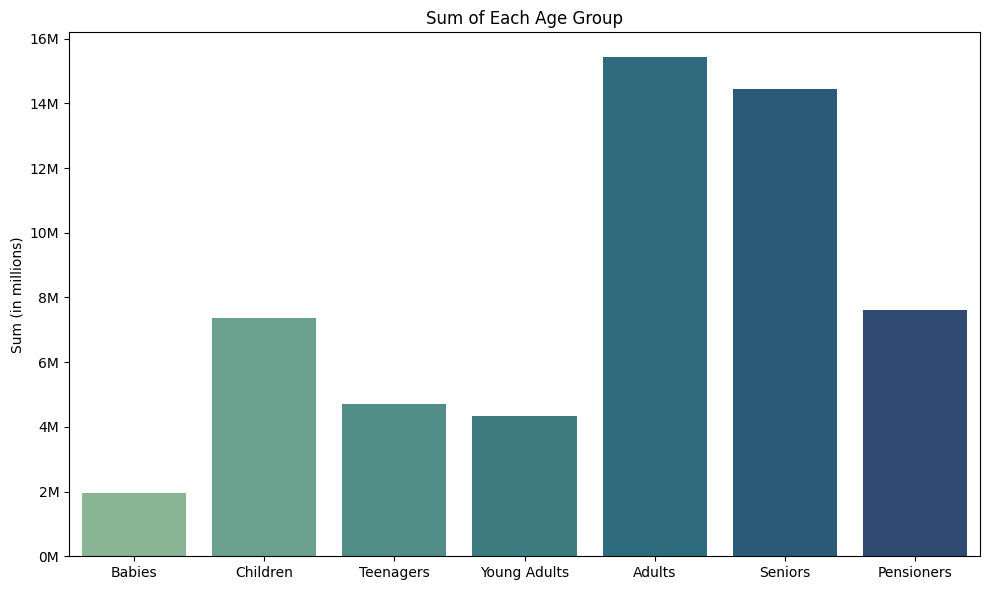

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your data into the 'population_data_cat' DataFrame
age_data = population_data_cat[['Babies', 'Children', 'Teenagers', 'Young Adults', 'Adults', 'Seniors', 'Pensioners']]

# Calculate the sum for each age group
age_sums = age_data.sum()

# Plotting using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_sums.index, y=age_sums.values, palette="crest")
plt.title('Sum of Each Age Group')
plt.ylabel('Sum (in millions)')

# plt code to format to millions
plt.gca().set_yticklabels(['{:.0f}M'.format(y/1e6) for y in plt.gca().get_yticks()])

plt.tight_layout()
plt.show()


In [223]:
# Filter and count places with population greater than 3000
places_above_3000 = population_data_cat[population_data_cat['All Ages'] > 3000]
count_places_above_3000 = len(places_above_3000)

print(len(population_data_cat))
print(f"Number of places with a population greater than 3000: {count_places_above_3000}")

34753
Number of places with a population greater than 3000: 656
